# Installing necessary libraries


In [5]:
import json
import numpy as np
import pandas as pd
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier



# Download NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/billpark/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/billpark/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/billpark/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
# Function to load JSON data into a DataFrame
def load_json_to_df(json_file):
    with open(json_file, 'r') as file:
        data = json.load(file)
    return pd.DataFrame.from_dict(data, orient='index')

# List of JSON files
json_files = ['HR.json', 'HF.json', 'MR.json', 'MF.json']
dfs = []

# Load each JSON file into a DataFrame and store them in a list
for json_file in json_files:
    df = load_json_to_df('data/' + json_file)
    dfs.append(df)

# Naming the DataFrames
HR_df, HF_df, MR_df, MF_df = dfs

In [7]:
HR = HR_df['text']
HF = HF_df['text']
MR = MR_df['text']
MF = MF_df['text']

In [8]:
df = pd.concat([HR, HF, MR, MF], ignore_index=True)

# Most Common words

In [9]:


# Assuming you've already defined load_json_to_df

# Function to load and tokenize the text from a DataFrame
def load_and_tokenize_text(json_file):
    df = load_json_to_df(json_file)
    # Tokenize each item in the 'text' column
    df['tokens'] = df['preprocessed_text'].apply(word_tokenize)
    return df

# List of JSON files
json_files = ['HR_prep.json', 'HF_prep.json', 'MR_prep.json', 'MF_prep.json']
category_data = []

# Load and tokenize each JSON file into a DataFrame and store them in a list
for json_file in json_files:
    df = load_and_tokenize_text('data/' + json_file)
    category_data.append(df)

# Extract tokenized words for each category
tokens_hr = [token for sublist in category_data[0]['tokens'] for token in sublist]
tokens_hf = [token for sublist in category_data[1]['tokens'] for token in sublist]
tokens_mr = [token for sublist in category_data[2]['tokens'] for token in sublist]
tokens_mf = [token for sublist in category_data[3]['tokens'] for token in sublist]

# Count and display the 50 most common words for each category
def display_common_words(tokens, category_name):
    counter = Counter(tokens)
    most_common = counter.most_common(50)
    print(f"Top 50 most common words in {category_name}:")
    for word, freq in most_common:
        print(f"{word}: {freq}")
    print("\n")

display_common_words(tokens_hr, "Human Real")
display_common_words(tokens_hf, "Human Fake")
display_common_words(tokens_mr, "Machine Real")
display_common_words(tokens_mf, "Machine Fake")


Top 50 most common words in Human Real:
said: 6500
like: 5881
time: 5839
one: 5649
show: 5380
year: 5116
new: 4893
also: 4541
first: 4058
people: 3949
season: 3882
say: 3525
get: 3513
im: 3389
love: 3279
star: 3242
day: 3201
know: 3074
two: 3019
life: 3011
would: 3003
back: 2896
thing: 2811
really: 2791
family: 2781
told: 2770
u: 2745
woman: 2663
think: 2658
dont: 2560
going: 2522
want: 2479
see: 2439
make: 2428
may: 2426
look: 2393
last: 2335
way: 2328
video: 2307
made: 2223
best: 2182
series: 2166
go: 2156
photo: 2103
even: 2102
story: 2088
fan: 2061
friend: 2036
image: 2019
together: 1999


Top 50 most common words in Human Fake:
time: 5605
said: 5370
source: 4969
like: 4902
year: 4850
one: 4702
new: 4164
also: 3530
love: 3499
say: 3495
told: 3366
family: 3184
life: 3184
people: 3151
would: 3149
get: 3088
together: 3052
show: 2988
first: 2960
two: 2957
star: 2920
relationship: 2920
want: 2877
know: 2875
shes: 2836
u: 2802
day: 2781
thing: 2779
friend: 2744
back: 2621
couple: 2592
ma

# Word Cloud

In [14]:
import sys
print(sys.executable)

/opt/anaconda3/bin/python


In [18]:
import sys
!{sys.executable} -m pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.3/168.3 kB 7.3 MB/s eta 0:00:00


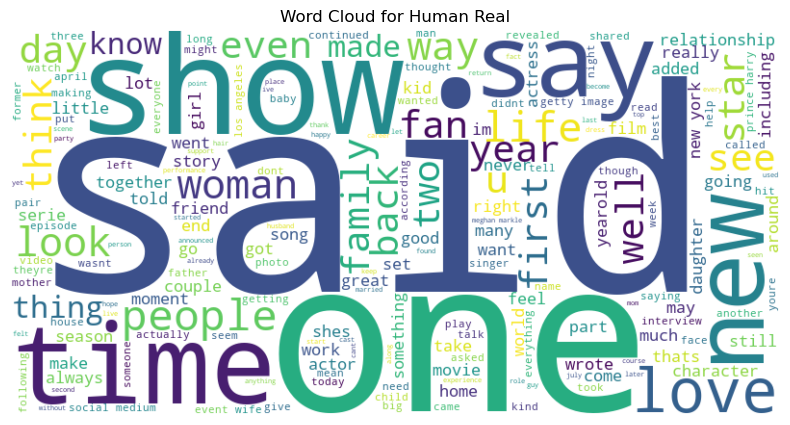

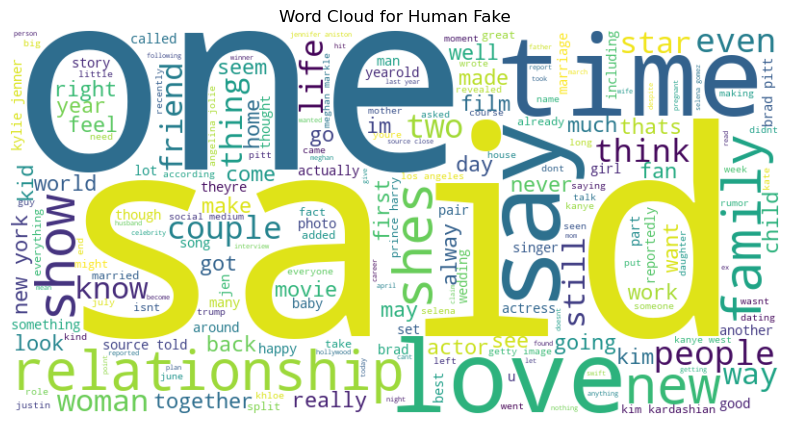

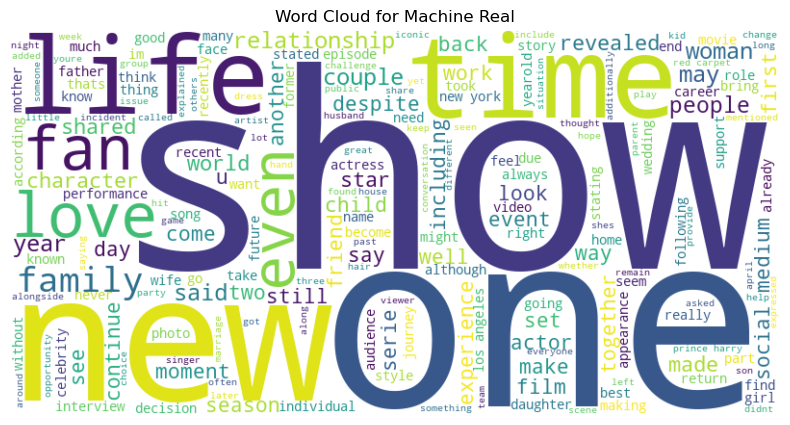

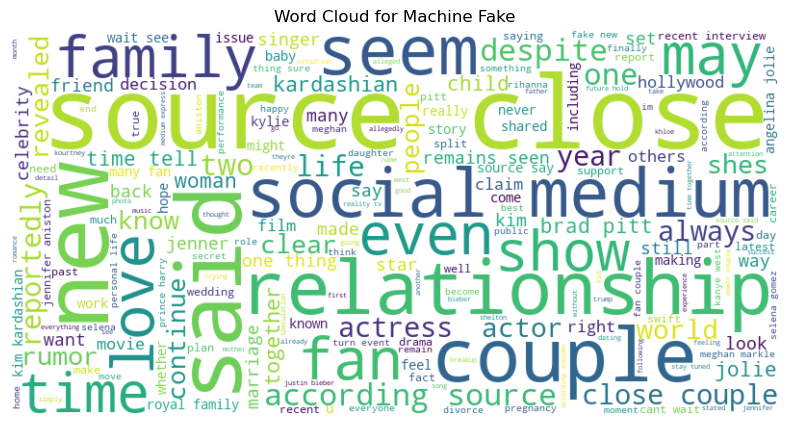

In [19]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def generate_word_cloud(tokens, title):
    # Join the list of tokens into a single string
    text = ' '.join(tokens)
    # Create a word cloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Assuming you have token lists: tokens_hr, tokens_hf, tokens_mr, tokens_mf
generate_word_cloud(tokens_hr, "Word Cloud for Human Real")
generate_word_cloud(tokens_hf, "Word Cloud for Human Fake")
generate_word_cloud(tokens_mr, "Word Cloud for Machine Real")
generate_word_cloud(tokens_mf, "Word Cloud for Machine Fake")


In [20]:
from sklearn.metrics import accuracy_score, classification_report

# Assigning labels for each comparison
labels_hr_vs_mf = [0] * len(HR) + [1] * len(MF)
labels_hf_vs_mf = [0] * len(HF) + [1] * len(MF)
labels_mr_vs_mf = [0] * len(MR) + [1] * len(MF)
labels_hf_vs_mr = [0] * len(HF) + [1] * len(MR)
labels_hr_vs_mr = [0] * len(HR) + [1] * len(MR)
labels_hr_vs_hf = [0] * len(HR) + [1] * len(HF)

#Separate for Human vs AI in general
labels_hr_hf = [0] * (len(HR) + len(HF))
labels_mr_mf = [1] * (len(MR) + len(MF))

labels_human_machine = labels_hr_hf + labels_mr_mf

In [21]:
# Splitting the data for each comparison
X_train_hr_vs_mf, X_test_hr_vs_mf, y_train_hr_vs_mf, y_test_hr_vs_mf = train_test_split(pd.concat([HR, MF], ignore_index=True), labels_hr_vs_mf, test_size=0.2, random_state=42)
X_train_hf_vs_mf, X_test_hf_vs_mf, y_train_hf_vs_mf, y_test_hf_vs_mf = train_test_split(pd.concat([HF, MF], ignore_index=True), labels_hf_vs_mf, test_size=0.2, random_state=42)
X_train_mr_vs_mf, X_test_mr_vs_mf, y_train_mr_vs_mf, y_test_mr_vs_mf = train_test_split(pd.concat([MR, MF], ignore_index=True), labels_mr_vs_mf, test_size=0.2, random_state=42)
X_train_hf_vs_mr, X_test_hf_vs_mr, y_train_hf_vs_mr, y_test_hf_vs_mr = train_test_split(pd.concat([HF, MR], ignore_index=True), labels_hf_vs_mr, test_size=0.2, random_state=42)
X_train_hr_vs_mr, X_test_hr_vs_mr, y_train_hr_vs_mr, y_test_hr_vs_mr = train_test_split(pd.concat([HR, MR], ignore_index=True), labels_hr_vs_mr, test_size=0.2, random_state=42)
X_train_hr_vs_hf, X_test_hr_vs_hf, y_train_hr_vs_hf, y_test_hr_vs_hf = train_test_split(pd.concat([HR, HF], ignore_index=True), labels_hr_vs_hf, test_size=0.2, random_state=42)

# Splitting the data for the comparison between human-generated and machine-generated text
X_train_human_machine, X_test_human_machine, y_train_human_machine, y_test_human_machine = train_test_split(pd.concat([pd.concat([HR, HF]), pd.concat([MR, MF])], ignore_index=True),labels_human_machine,test_size=0.2,random_state=42)


In [22]:

# Creating TF-IDF vectorizer for each comparison
tfidf_vectorizer_hr_vs_mf = TfidfVectorizer(max_features=5000)
X_train_hr_vs_mf_tfidf = tfidf_vectorizer_hr_vs_mf.fit_transform(X_train_hr_vs_mf)
X_test_hr_vs_mf_tfidf = tfidf_vectorizer_hr_vs_mf.transform(X_test_hr_vs_mf)

tfidf_vectorizer_hf_vs_mf = TfidfVectorizer(max_features=5000)
X_train_hf_vs_mf_tfidf = tfidf_vectorizer_hf_vs_mf.fit_transform(X_train_hf_vs_mf)
X_test_hf_vs_mf_tfidf = tfidf_vectorizer_hf_vs_mf.transform(X_test_hf_vs_mf)

tfidf_vectorizer_mr_vs_mf = TfidfVectorizer(max_features=5000)
X_train_mr_vs_mf_tfidf = tfidf_vectorizer_mr_vs_mf.fit_transform(X_train_mr_vs_mf)
X_test_mr_vs_mf_tfidf = tfidf_vectorizer_mr_vs_mf.transform(X_test_mr_vs_mf)

tfidf_vectorizer_hf_vs_mr = TfidfVectorizer(max_features=5000)
X_train_hf_vs_mr_tfidf = tfidf_vectorizer_hf_vs_mr.fit_transform(X_train_hf_vs_mr)
X_test_hf_vs_mr_tfidf = tfidf_vectorizer_hf_vs_mr.transform(X_test_hf_vs_mr)

tfidf_vectorizer_hr_vs_mr = TfidfVectorizer(max_features=5000)
X_train_hr_vs_mr_tfidf = tfidf_vectorizer_hr_vs_mr.fit_transform(X_train_hr_vs_mr)
X_test_hr_vs_mr_tfidf = tfidf_vectorizer_hr_vs_mr.transform(X_test_hr_vs_mr)

tfidf_vectorizer_hr_vs_hf = TfidfVectorizer(max_features=5000)
X_train_hr_vs_hf_tfidf = tfidf_vectorizer_hr_vs_hf.fit_transform(X_train_hr_vs_hf)
X_test_hr_vs_hf_tfidf = tfidf_vectorizer_hr_vs_hf.transform(X_test_hr_vs_hf)

# human and machine in general

# Create TF-IDF vectorizer for human vs. machine comparison
tfidf_vectorizer_human_machine = TfidfVectorizer()
X_train_human_machine_tfidf = tfidf_vectorizer_human_machine.fit_transform(X_train_human_machine)
X_test_human_machine_tfidf = tfidf_vectorizer_human_machine.transform(X_test_human_machine)

# Trying things out

In [23]:
def clean_text(text):
    # Add your text preprocessing code here
    return text.lower().strip()

def prepare_data_for_comparison(df1, df2):
    combined_texts = pd.concat([df1['text'], df2['text']]).apply(clean_text)
    X = combined_texts.values.reshape(-1, 1)  # Dummy feature vector
    labels = np.array([0] * len(df1) + [1] * len(df2))
    return X, labels

In [24]:
# Function to train and evaluate the XGBoost model
def train_and_evaluate_xgboost(X_train, X_test, y_train, y_test):
    # Model initialization
    model = XGBClassifier(use_label_encoder=False, eval_metric=['logloss', 'error'])  # Track both log loss and error
    
    # Define evaluation set
    eval_set = [(X_train, y_train), (X_test, y_test)]

    # Model training with evaluation history
    model.fit(X_train, y_train, eval_set=eval_set, verbose=False, early_stopping_rounds=10)

    # Model evaluation
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    # Retrieve performance metrics
    history = model.evals_result()
    
    # Extracting the last error rate from the history
    training_accuracy = [1 - x for x in history["validation_0"]["error"]]
    validation_accuracy = [1 - x for x in history["validation_1"]["error"]]
    
    # Adding accuracy and validation accuracy to the history dictionary
    history["accuracy"] = training_accuracy
    history["val_accuracy"] = validation_accuracy

    return model, accuracy, report, history


# Example: Training and evaluating the XGBoost model for HR vs. MF comparison
model_hr_vs_mf, accuracy_hr_vs_mf, report_hr_vs_mf, history_hr_vs_mf = train_and_evaluate_xgboost(
    X_train_hf_vs_mf_tfidf, 
    X_test_hf_vs_mf_tfidf, 
    y_train_hf_vs_mf, 
    y_test_hf_vs_mf
)

# Training and evaluating the XGBoost model for HF vs MF comparison

model_hf_vs_mf, accuracy_hf_vs_mf, _, history_hf_vs_mf = train_and_evaluate_xgboost(
    X_train_hf_vs_mf_tfidf, 
    X_test_hf_vs_mf_tfidf, 
    y_train_hf_vs_mf, 
    y_test_hf_vs_mf
)


# Training and evaluating the model for MR vs MF comparison
model_mr_vs_mf, accuracy_mr_vs_mf, _, history_mr_vs_mf = train_and_evaluate_xgboost(
    X_train_mr_vs_mf_tfidf,
    X_test_mr_vs_mf_tfidf,
    y_train_mr_vs_mf,
    y_test_mr_vs_mf
)

# Training and evaluating the model for HF vs MR comparison
model_hf_vs_mr, accuracy_hf_vs_mr, _, history_hf_vs_mr = train_and_evaluate_xgboost(
    X_train_hf_vs_mr_tfidf,
    X_test_hf_vs_mr_tfidf,
    y_train_hf_vs_mr,
    y_test_hf_vs_mr
)

# Training and evaluating the model for HR vs MR comparison
model_hr_vs_mr, accuracy_hr_vs_mr, _, history_hr_vs_mr = train_and_evaluate_xgboost(
    X_train_hr_vs_mr_tfidf,
    X_test_hr_vs_mr_tfidf,
    y_train_hr_vs_mr,
    y_test_hr_vs_mr
)


# Training and evaluating the model for HR vs HF comparison
model_hr_vs_hf, accuracy_hr_vs_hf, _, history_hr_vs_hf = train_and_evaluate_xgboost(
    X_train_hr_vs_hf_tfidf,
    X_test_hr_vs_hf_tfidf,
    y_train_hr_vs_hf,
    y_test_hr_vs_hf
)

# Train and evaluate the XGBoost model for human vs. machine comparison
model_human_machine, accuracy_human_machine, report_human_machine, history_human_machine = train_and_evaluate_xgboost(
    X_train_human_machine_tfidf, 
    X_test_human_machine_tfidf, 
    y_train_human_machine, 
    y_test_human_machine
)

/opt/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in c

# Testing visuals

#### Visualization of Model Training and Validation Metrics
  1. **Setup**: Generate two subplots—one for accuracy and the other for loss.
  2. **Accuracy Plot**: Show both training and validation accuracy over epochs. Training accuracy indicates how well the model is learning the dataset, while validation accuracy shows how well the model generalizes to new data.
  3. **Loss Plot**: Display training and validation loss over epochs. Training loss measures how well the model fits the data, whereas validation loss measures model performance on the unseen data.
- **Rationale**:
  - **Accuracy and Loss Trends**:
    - **Consistent Increase in Validation Accuracy** and **Decrease in Validation Loss** suggest good model generalization.
    - **Large Gaps between Training and Validation Metrics** may indicate **overfitting**, where the model learns the training data too well, including the noise and errors, at the expense of its ability to generalize.
    - **High Validation Loss** or **Plateaus in Validation Accuracy** can signal **underfitting**, where the model does not perform well even on training data, suggesting it is too simple.
- **Outputs**:
  - A combined plot with training and validation accuracy and loss, providing a visual representation of the model's learning curve and its ability to generalize across epochs.

In [25]:
import matplotlib.pyplot as plt

def plot_history(history, comparison_name):
    plt.figure(figsize=(12, 6))
    plt.suptitle(f'Model Training and Validation Metrics for {comparison_name}')
    
    plt.subplot(1, 2, 1)
    train_accuracy = history['accuracy']
    val_accuracy = history['val_accuracy']
    epochs = range(1, len(train_accuracy) + 1)
    plt.plot(epochs, train_accuracy, label='Training Accuracy')
    plt.plot(epochs, val_accuracy, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history['validation_0']['logloss'], label='Training Log Loss')
    plt.plot(history['validation_1']['logloss'], label='Validation Log Loss')
    plt.title('Log Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Log Loss')
    plt.legend()

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


Accuracy HF vs MF: 0.9651162790697675


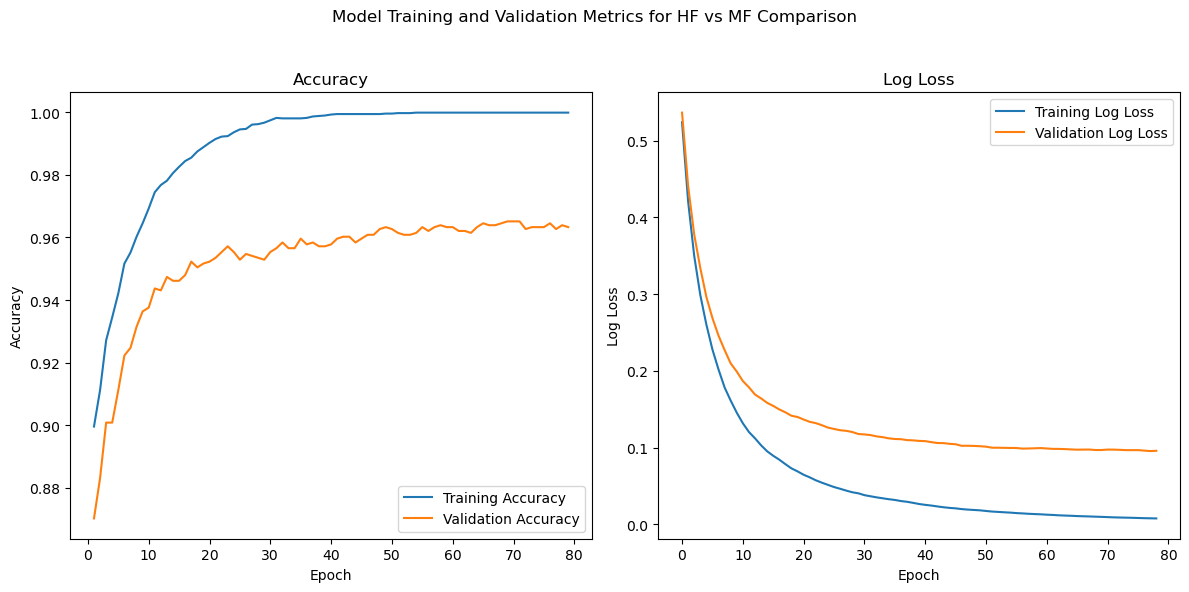

In [26]:
# Call plot_history function with the appropriate history data
print(f"Accuracy HF vs MF: {accuracy_hf_vs_mf}")
plot_history(history_hf_vs_mf, 'HF vs MF Comparison')

Accuracy HR vs MF: 0.9651162790697675


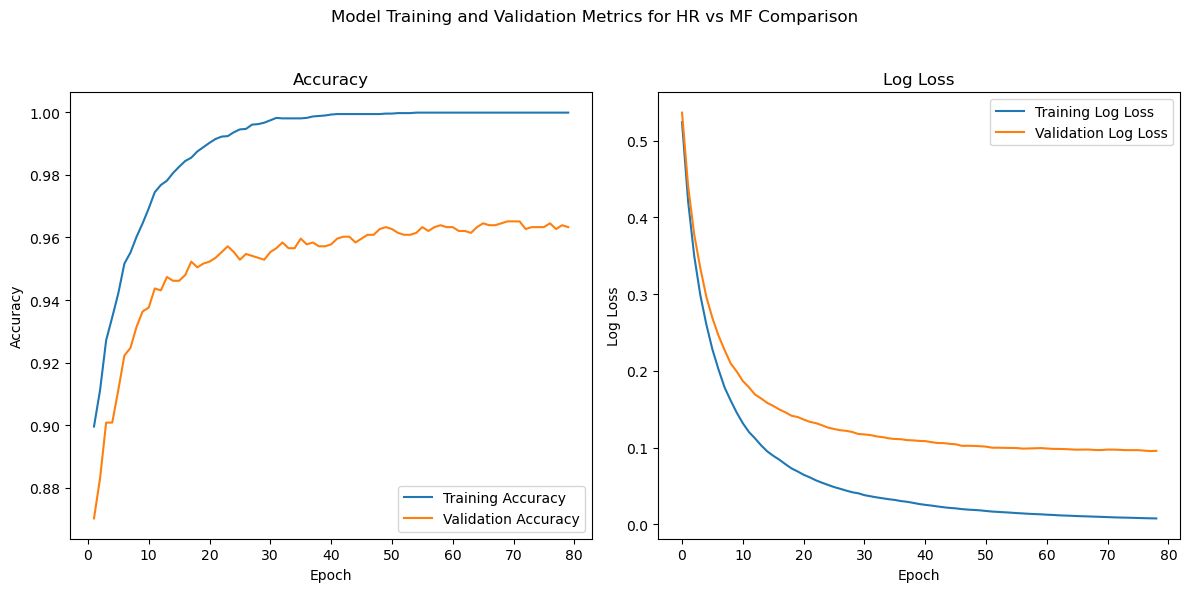

In [27]:
print(f"Accuracy HR vs MF: {accuracy_hr_vs_mf}")
plot_history(history_hr_vs_mf, 'HR vs MF Comparison')

Accuracy HF vs MR: 0.9158086008479709


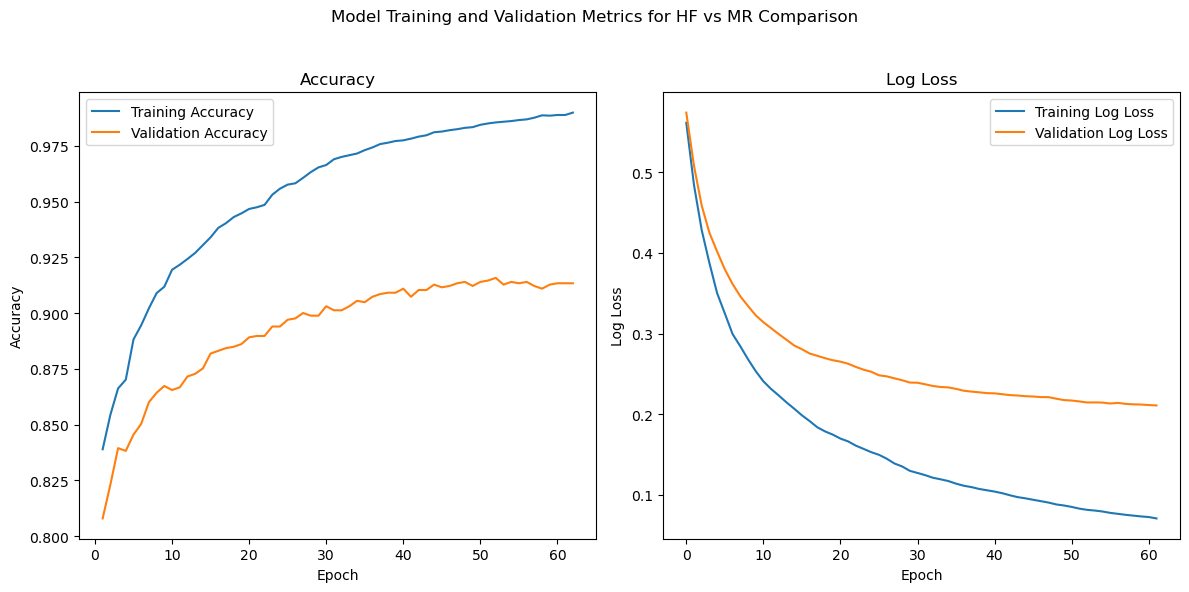

In [28]:
print(f"Accuracy HF vs MR: {accuracy_hf_vs_mr}")
plot_history(history_hf_vs_mr, 'HF vs MR Comparison')

Accuracy HR vs MR: 0.8804804804804804


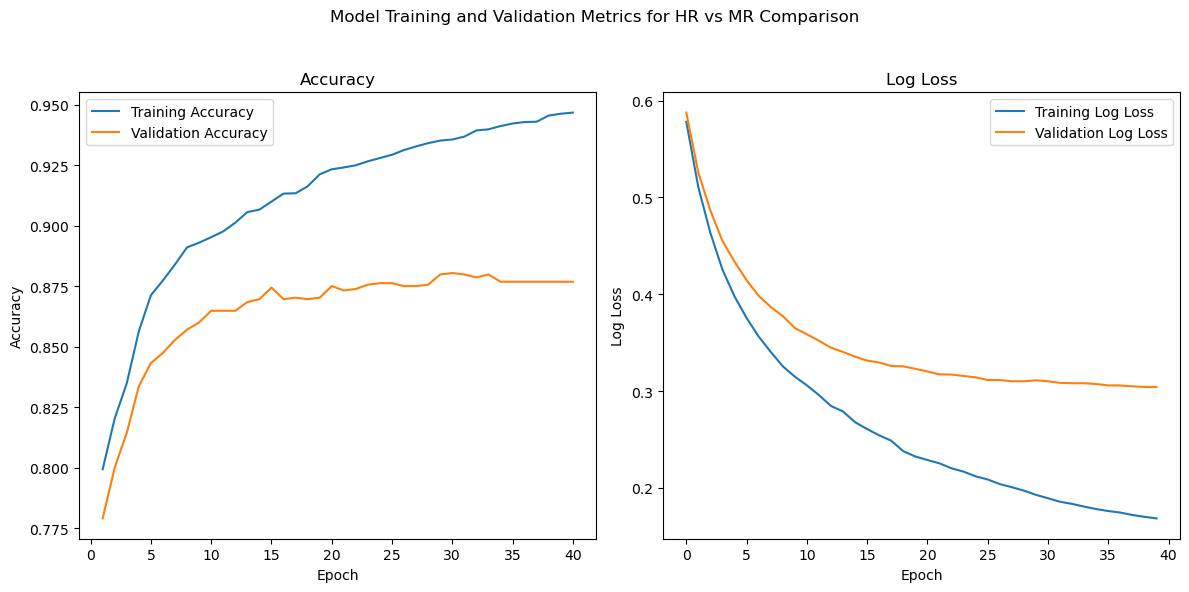

In [29]:
print(f"Accuracy HR vs MR: {accuracy_hr_vs_mr}")
plot_history(history_hr_vs_mr, 'HR vs MR Comparison')

Accuracy HR vs HF: 0.7839805825242718


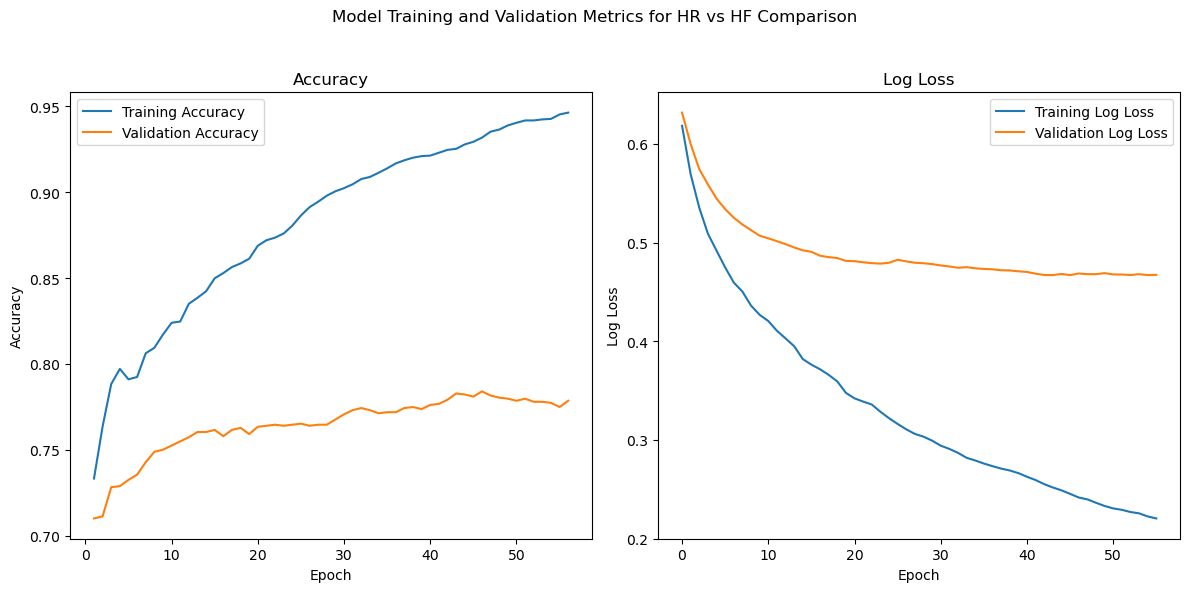

In [30]:
print(f"Accuracy HR vs HF: {accuracy_hr_vs_hf}")
plot_history(history_hr_vs_hf, 'HR vs HF Comparison')

Accuracy MR vs MF: 0.9509388249545729


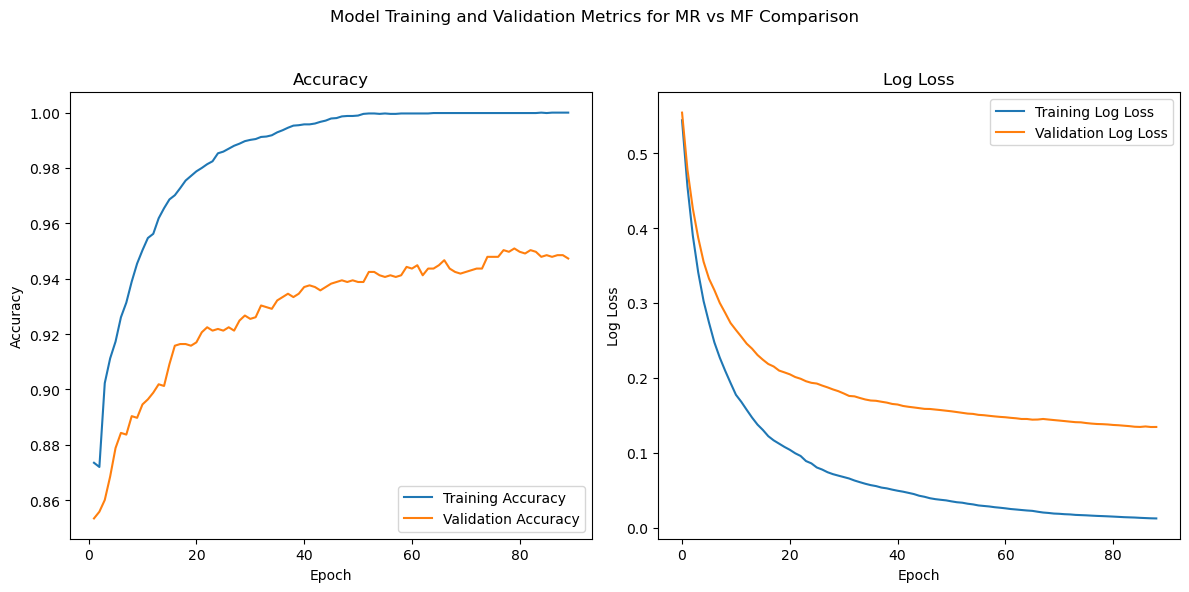

In [31]:
print(f"Accuracy MR vs MF: {accuracy_mr_vs_mf}")
plot_history(history_mr_vs_mf, 'MR vs MF Comparison')

Accuracy All Human vs All Machine: 0.9184354154032747


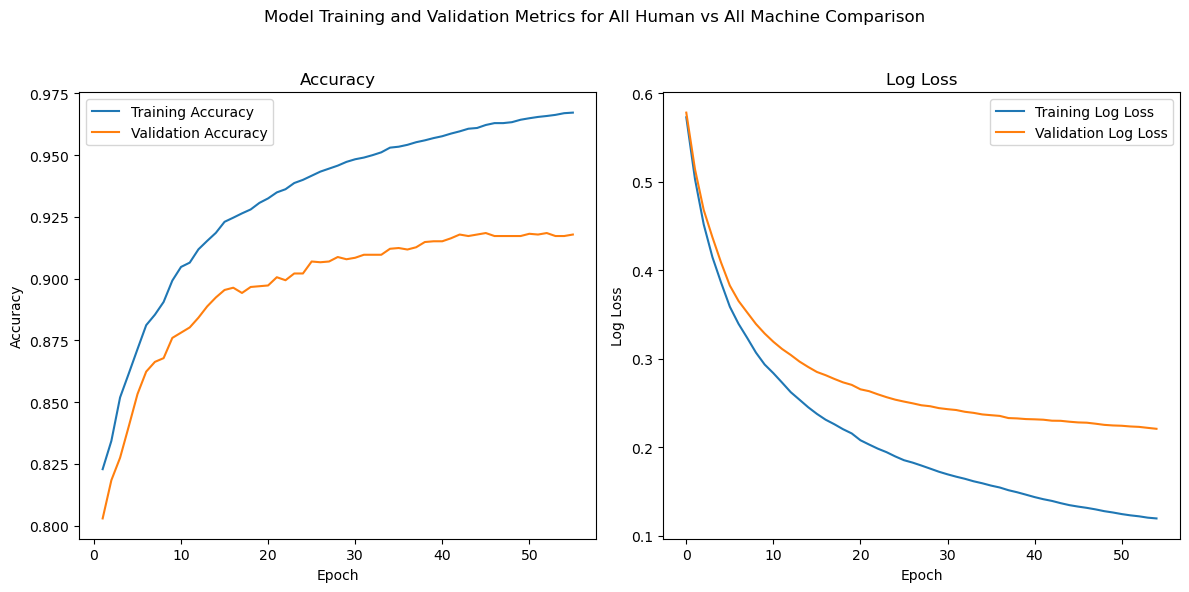

In [32]:
print(f"Accuracy All Human vs All Machine: {accuracy_human_machine}")
plot_history(history_human_machine, 'All Human vs All Machine Comparison')
